# First we are going to create some test data of object detection moving in 2d space

It will start on the right side of a 256x256 screen and move towards the center with varying velocities

We will then use a kalman filter to track the object's position and velocity

Finally, we will plot the actual and predicted positions to see how well the kalman filter did

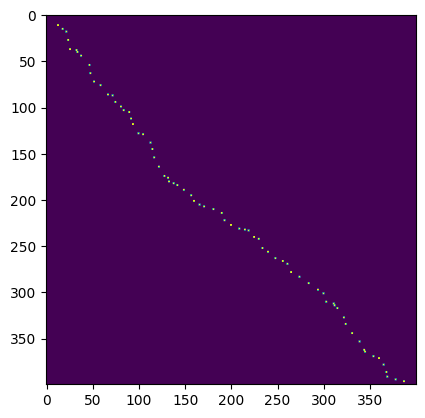

In [1]:
import object_tracking.kalman_filter.fake_data as fake_data
import numpy as np
import matplotlib.pyplot as plt
all_boxes = fake_data.generate_fake_data()

frame = np.zeros((400, 400))

def plot_trajectory(frame: np.ndarray, all_boxes: list, intensity: int = 1):
    """Plots the traject of cx, cy, w, h on a 256x256 frame"""
    for box in all_boxes:
        frame[box[1]:box[1]+box[3], box[0]:box[0]+box[2]] = intensity
    plt.imshow(frame)
    plt.show()
    return frame
    
initial_frame = plot_trajectory(frame, all_boxes)

[[12, 11, 1, 1], [14, 13, 1, 1], [18, 16, 1, 1], [22, 21, 1, 1], [26, 28, 1, 1], [29, 34, 1, 1], [33, 40, 1, 1], [37, 47, 1, 1], [36, 55, 1, 1], [68, 62, 1, 1], [57, 71, 1, 1], [85, 65, 1, 1], [73, 81, 1, 1], [98, 52, 1, 1], [79, 85, 1, 1], [93, 85, 1, 1], [89, 97, 1, 1], [85, 111, 1, 1], [116, 75, 1, 1], [99, 108, 1, 1], [118, 111, 1, 1], [111, 125, 1, 1], [92, 143, 1, 1], [127, 139, 1, 1], [124, 150, 1, 1], [121, 162, 1, 1], [114, 173, 1, 1], [208, 148, 1, 1], [148, 174, 1, 1], [168, 169, 1, 1], [154, 178, 1, 1], [139, 186, 1, 1], [256, 196, 1, 1], [181, 201, 1, 1], [208, 203, 1, 1], [188, 206, 1, 1], [162, 209, 1, 1], [277, 216, 1, 1], [221, 222, 1, 1], [2489, 177, 1, 1], [241, 230, 1, 1], [248, 231, 1, 1], [236, 232, 1, 1], [224, 233, 1, 1], [194, 228, 1, 1], [299, 279, 1, 1], [266, 268, 1, 1], [228, 254, 1, 1], [343, 300, 1, 1], [292, 281, 1, 1], [189, 228, 1, 1], [316, 308, 1, 1], [311, 307, 1, 1], [302, 303, 1, 1], [290, 299, 1, 1], [3, 113, 1, 1], [335, 328, 1, 1], [333, 328, 1

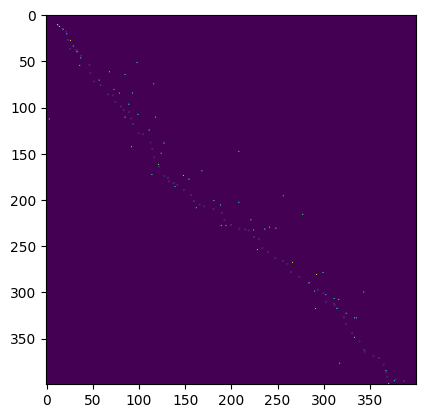

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [2]:
from object_tracking.kalman_filter.schema_1d import KalmanStateVector1D, Kalman1DTracker

state_x = KalmanStateVector1D(x=all_boxes[0][0], vx=0)
state_y = KalmanStateVector1D(x=all_boxes[0][1], vx=0)
tracker_x = Kalman1DTracker(state_x, state_noise_std=.01, measurement_noise_std=.01)
tracker_y = Kalman1DTracker(state_y, state_noise_std=.01, measurement_noise_std=.01)

states = []
for box in all_boxes:
    tracker_x.update(box[0], dt=1)
    tracker_y.update(box[1], dt=1)
    states.append([int(tracker_x.state.x), int(tracker_y.state.x), 1, 1])

frame = np.zeros((512, 512))
print(states)
plot_trajectory(initial_frame, states, intensity=10)